# **Customer Segmentation with RFM Analysis**

  This project explores customer behavior using transactional data from a large retail store.
  
  By applying RFM (Recency, Frequency, Monetary) analysis, we segmented customers based on their purchasing patterns—such as recent activity, visit frequency, and spending amount by product category.
  
  The goal is to identify high-value customers and develop effective marketing strategies to retain them and maximize revenue.

#### **Column Descriptions**

- ID: unique identifier assigned to each customer

- signup_ym: year and month of customer signup

- birth_year: year of birth

- annual_income: annual income

- marital_status: marital status

- children: number of dependent children

- recency: days since the last purchase

- amount_alcohol: amount spent on alcohol

- amount_fruit: amount spent on fruit

- amount_meat: amount spent on meat

- amount_fish: amount spent on seafood

- amount_snack: amount spent on snacks

- amount_general: amount spent on general goods

- num_purchase_web: number of purchases made via website

- num_purchase_store: number of purchases made in-store

- num_purchase_discount: number of purchases made with discounts

- promotion_{number}: indicates participation in promotions 1 to 6

  (1 = participated, 0 = not participated)

- revenue: total revenue from the customer

## **1. Data Exploration and Preprocessing**

In [1]:
import numpy as np
import pandas as pd

!apt-get -qq install fonts-nanum
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
from matplotlib import rc
import seaborn as sns

plt.rc('font', family='NanumGothic')
plt.rc('font', family='AppleGothic')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 5)

pd.set_option('display.max_columns', None)

Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/DataAnalytics/customer.csv'
cust_df = pd.read_csv(file_path, sep='\t')
cust_df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


In [4]:
# Convert marital status to English
marital_status_map = {
    '미혼': 'Single',
    '배우자 있음': 'Married',
    '사별': 'Widowed',
    '이혼': 'Divorced'
}
cust_df['marital_status'] = cust_df['marital_status'].replace(marital_status_map)
cust_df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,Single,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,Single,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,Married,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,Married,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,Married,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


In [5]:
cust_df.shape

(2240, 23)

In [6]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

In [7]:
cust_df.describe()

,ID,birth_year,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
mean,5592.159821,1976.805804,6.792143e+07,0.950446,49.109375,3.951164e+05,34192.901786,2.170350e+05,48783.080357,35181.830357,57228.437500,4.084821,5.790179,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,11.0
std,3246.662198,11.984069,3.272500e+07,0.751803,28.962453,4.375766e+05,51705.463894,2.934300e+05,71017.673224,53664.648034,67817.670589,2.778714,3.250958,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.0
min,0.000000,1901.000000,2.249000e+06,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
25%,2828.250000,1967.000000,4.589390e+07,0.000000,24.000000,3.087500e+04,1300.000000,2.080000e+04,3900.000000,1300.000000,11700.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
50%,5458.500000,1978.000000,6.679595e+07,1.000000,49.000000,2.255500e+05,10400.000000,8.710000e+04,15600.000000,10400.000000,31200.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
75%,8427.750000,1985.000000,8.907860e+07,1.000000,74.000000,6.555250e+05,42900.000000,3.016000e+05,65000.000000,42900.000000,72800.000000,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
max,11191.000000,2004.000000,8.666658e+08,3.000000,99.000000,1.940900e+06,258700.000000,2.242500e+06,336700.000000,341900.000000,470600.000000,27.000000,13.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.0


In [8]:
cust_df.describe(include='all')

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
count,2240.000000,2240,2240.000000,2.216000e+03,2240,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
unique,NaN,24,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12,NaN,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,111,NaN,NaN,1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,NaN,1976.805804,6.792143e+07,NaN,0.950446,49.109375,3.951164e+05,34192.901786,2.170350e+05,48783.080357,35181.830357,57228.437500,4.084821,5.790179,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,11.0
std,3246.662198,NaN,11.984069,3.272500e+07,NaN,0.751803,28.962453,4.375766e+05,51705.463894,2.934300e+05,71017.673224,53664.648034,67817.670589,2.778714,3.250958,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.0
min,0.000000,NaN,1901.000000,2.249000e+06,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
25%,2828.250000,NaN,1967.000000,4.589390e+07,NaN,0.000000,24.000000,3.087500e+04,1300.000000,2.080000e+04,3900.000000,1300.000000,11700.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
50%,5458.500000,NaN,1978.000000,6.679595e+07,NaN,1.000000,49.000000,2.255500e+05,10400.000000,8.710000e+04,15600.000000,10400.000000,31200.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
75%,8427.750000,NaN,1985.000000,8.907860e+07,NaN,1.000000,74.000000,6.555250e+05,42900.000000,3.016000e+05,65000.000000,42900.000000,72800.000000,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0


In [9]:
object_cols = cust_df.columns[cust_df.dtypes == 'object']
for col in object_cols:
  unique_vals = sorted(cust_df[col].unique())
  print(f'{col}: {len(unique_vals)}개')
  print(unique_vals, '\n')

signup_ym: 24개
['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09'] 

marital_status: 4개
['Divorced', 'Married', 'Single', 'Widowed'] 



In [10]:
cust_df.isna().sum()

,0
ID,0
signup_ym,0
birth_year,0
annual_income,24
marital_status,0
children,0
recency,0
amount_alcohol,0
amount_fruit,0
amount_meat,0


In [11]:
cust_df_null = cust_df[cust_df.isna().any(axis=1)]
cust_df_null

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
10,1994,2022-02,1991,NaN,Married,1,11,6500,6500,7800,0,2600,1300,1,2,1,0,0,0,0,0,0,11
27,5255,2021-05,1994,NaN,Single,1,19,6500,1300,3900,3900,341900,470600,27,0,0,0,0,0,0,0,0,11
43,7281,2022-02,1967,NaN,Single,0,80,105300,14300,65000,3900,2600,50700,1,4,1,0,0,0,0,0,0,11
48,7244,2022-03,1959,NaN,Single,3,96,62400,6500,62400,7800,13000,9100,2,4,3,0,0,0,0,0,0,11
58,8557,2021-09,1990,NaN,Single,1,57,14300,3900,28600,2600,2600,7800,2,3,2,0,0,0,0,0,0,11
71,10629,2020-12,1981,NaN,Married,1,25,32500,3900,55900,22100,5200,22100,3,3,3,0,0,0,0,0,0,11
90,8996,2021-02,1965,NaN,Married,3,4,299000,54600,249600,63700,48100,68900,7,8,12,0,0,0,0,0,0,11
91,9235,2022-08,1965,NaN,Single,2,45,9100,0,10400,2600,0,1300,1,2,1,0,0,0,0,0,0,11
92,5798,2022-02,1981,NaN,Married,0,87,578500,48100,466700,127400,36400,23400,2,8,1,0,0,0,0,0,0,11
128,8268,2021-10,1969,NaN,Married,1,23,457600,0,35100,13000,0,19500,6,7,3,0,0,0,0,0,0,11


In [12]:
cust_df = cust_df.dropna()
cust_df.isna().sum()

,0
ID,0
signup_ym,0
birth_year,0
annual_income,0
marital_status,0
children,0
recency,0
amount_alcohol,0
amount_fruit,0
amount_meat,0


In [13]:
# Calculate age and rename column
cust_df.loc[:, 'birth_year'] = 2025 - cust_df['birth_year']
cust_df = cust_df.rename(columns={'birth_year': 'age'})

In [14]:
# Total spending amount
total_spent = (
    cust_df['amount_alcohol']
    + cust_df['amount_fruit']
    + cust_df['amount_meat']
    + cust_df['amount_fish']
    + cust_df['amount_snack']
    + cust_df['amount_general']
)
idx_amt_general = cust_df.columns.get_loc('amount_general')
cust_df.insert(loc=idx_amt_general+1,
               column='amount_total',
               value=total_spent
)

# Total number of purchases
total_purchases = (
    cust_df['num_purchase_web']
    + cust_df['num_purchase_store']
    + cust_df['num_purchase_discount']
)
idx_discount = cust_df.columns.get_loc('num_purchase_discount')
cust_df.insert(
    loc=idx_discount+1,
    column='num_purchase_total',
    value=total_purchases
)

cust_df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,60,75579400.0,Single,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,11
1,2174,2022-06,63,60247200.0,Single,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,11
2,4141,2021-11,52,93096900.0,Married,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0,11
3,6182,2022-05,33,34639800.0,Married,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0,11
4,5324,2022-04,36,75780900.0,Married,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0,11


In [15]:
cust_df['revenue'].describe()

,revenue
count,2216.0
mean,11.0
std,0.0
min,11.0
25%,11.0
50%,11.0
75%,11.0
max,11.0


The revenue column contains only the constant value 11 across all rows, which suggests it may be an incorrect or placeholder value. Therefore, we decided to drop this column from the analysis.












In [16]:
# Remove unnecessary columns
cust_df = cust_df.drop(columns=['ID', 'revenue'])
cust_df.head(0)

,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6


## **2. Demographic Analysis**

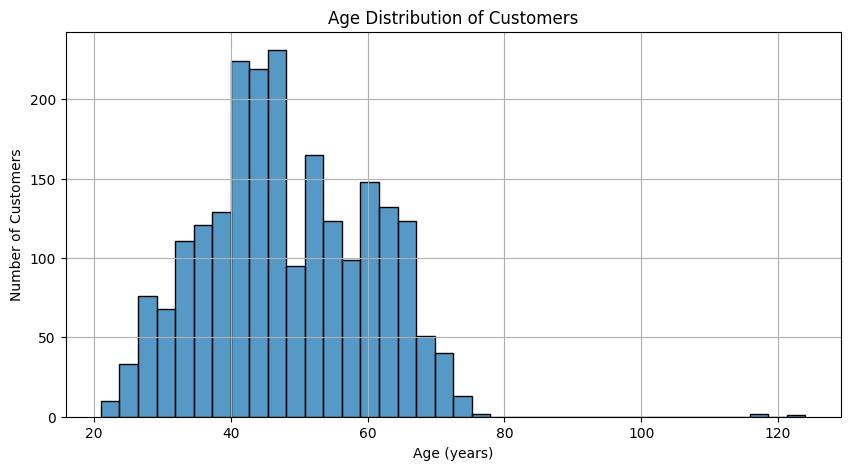

In [17]:
# Age distribution visualization
sns.histplot(data=cust_df['age'])
plt.title('Age Distribution of Customers')
plt.xlabel('Age (years)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

In [18]:
cust_df.sort_values(by='age', ascending=False)

,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
239,2022-08,124,78236600.0,Single,1,23,10400,0,6500,9100,0,2600,28600,1,2,1,4,0,0,0,0,0,0
339,2021-12,118,108591600.0,Married,0,36,981500,187200,730600,135200,83200,291200,2408900,4,4,1,9,0,0,0,0,1,0
192,2021-12,117,47632000.0,Divorced,1,99,19500,7800,10400,9100,5200,32500,84500,2,2,1,5,0,0,0,0,0,0
1950,2021-10,77,66483300.0,Single,0,96,187200,0,9100,0,0,7800,204100,3,4,1,8,0,0,0,0,0,0
424,2021-07,76,120935100.0,Married,0,77,1670500,54600,930800,71500,0,27300,2754700,7,5,0,12,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,2020-12,22,108234100.0,Single,0,56,696800,35100,767000,49400,139100,87100,1774500,5,12,1,18,0,0,1,0,1,1
995,2022-06,22,45271200.0,Single,0,65,5200,2600,14300,2600,0,5200,29900,1,2,1,4,0,0,0,0,0,0
747,2022-06,22,92511900.0,Single,0,30,367900,22100,483600,179400,137800,57200,1248000,3,12,1,16,0,0,0,0,0,0
1170,2022-05,21,18747300.0,Married,0,81,0,0,2600,3900,3900,10400,20800,1,2,1,4,0,0,1,0,0,0


In [19]:
# Remove outlier ages
cust_df = cust_df[cust_df['age'] < 100]

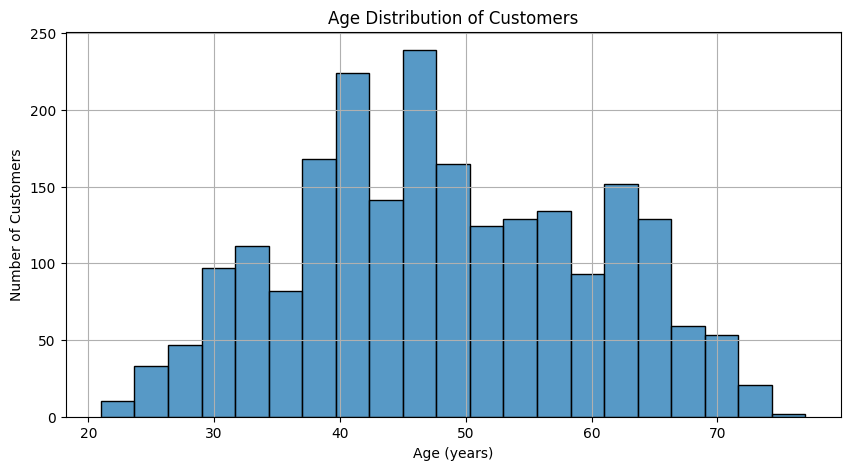

In [20]:
sns.histplot(data=cust_df['age'])
plt.title('Age Distribution of Customers')
plt.xlabel('Age (years)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

In [21]:
# Create age groups and assign labels
age_bins = list(range(10, 81, 10))
age_labels = [f'{x}s' for x in age_bins[:-1]]  # Exclude the last label to prevent having more labels than bins
age_group = pd.cut(x=cust_df['age'],
                   bins=age_bins,
                   labels=age_labels,
                   right=False
                   )

In [22]:
cust_df.insert(
    loc=cust_df.columns.get_loc('age')+1,
    column='age_group',
    value=age_group,
)
cust_df.head()

,signup_ym,age,age_group,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,2020-12,60,60s,75579400.0,Single,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1
1,2022-06,63,60s,60247200.0,Single,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0
2,2021-11,52,50s,93096900.0,Married,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0
3,2022-05,33,30s,34639800.0,Married,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0
4,2022-04,36,30s,75780900.0,Married,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0


In [23]:
cust_df['age_group'].value_counts()

,count
age_group,
40s,725
50s,483
30s,429
60s,402
20s,119
70s,55
10s,0


In [24]:
# Merge age groups
age_merge_map = {
    '10s': 'Under 30',
    '20s': 'Under 30',
    '60s': '60 and above',
    '70s': '60 and above'
}
cust_df['age_group'] = cust_df['age_group'].astype(str).replace(age_merge_map)

In [25]:
cust_df['age_group'].value_counts()

,count
age_group,
40s,725
50s,483
60 and above,457
30s,429
Under 30,119


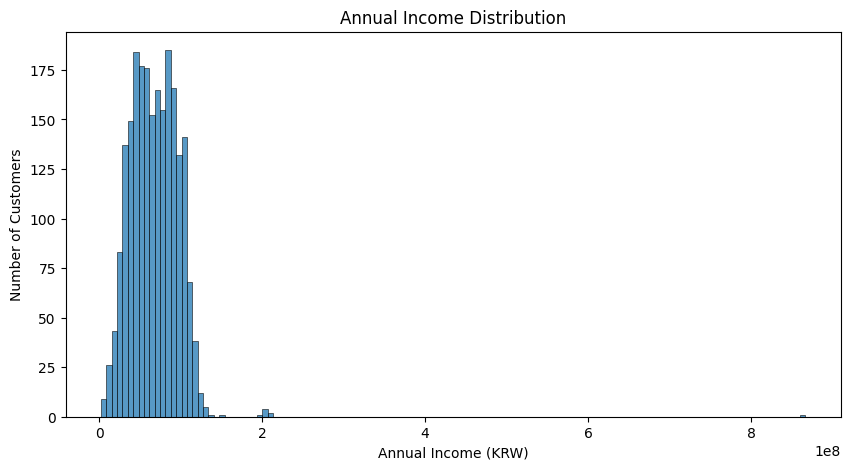

In [26]:
# Annual Income Distribution Visualization
sns.histplot(data=cust_df['annual_income'])
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (KRW)')
plt.ylabel('Number of Customers')
plt.show()

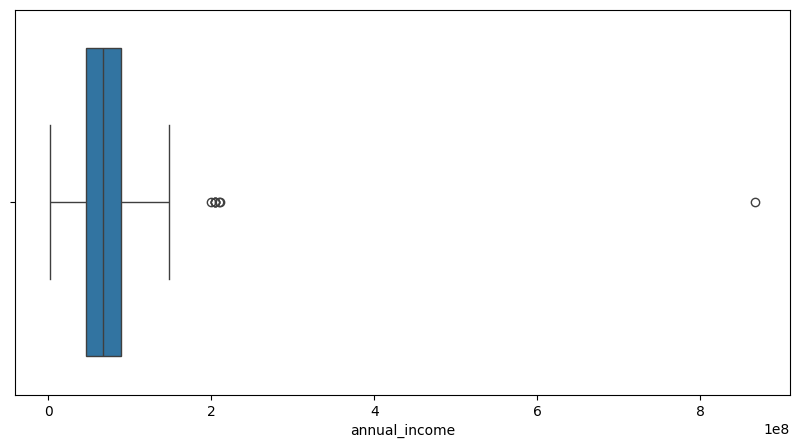

In [27]:
sns.boxplot(data=cust_df, x='annual_income');

In [28]:
# Remove income outliers (based on IQR method)
income = cust_df['annual_income']
q1, q3 = income.quantile([0.25, 0.75])
iqr = q3 - q1
cust_df = cust_df[(income >= q1 - 1.5*iqr) & (income <= q3 + 1.5*iqr)]

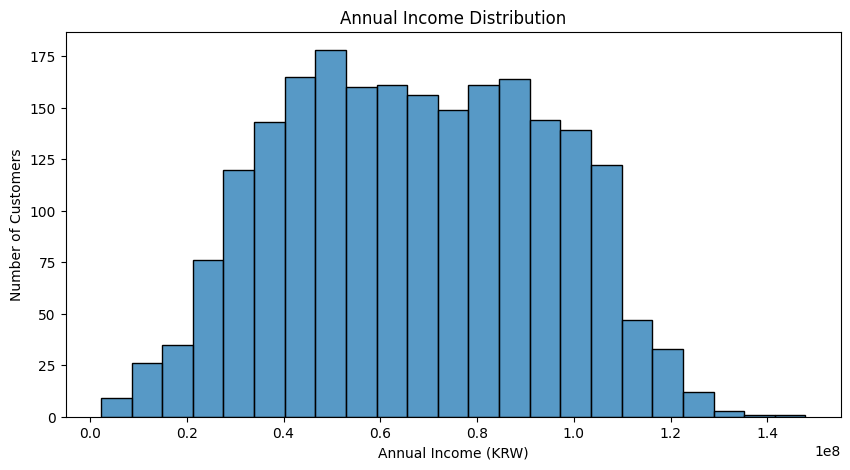

In [29]:
sns.histplot(data=cust_df['annual_income'])
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (KRW)')
plt.ylabel('Number of Customers')
plt.show()

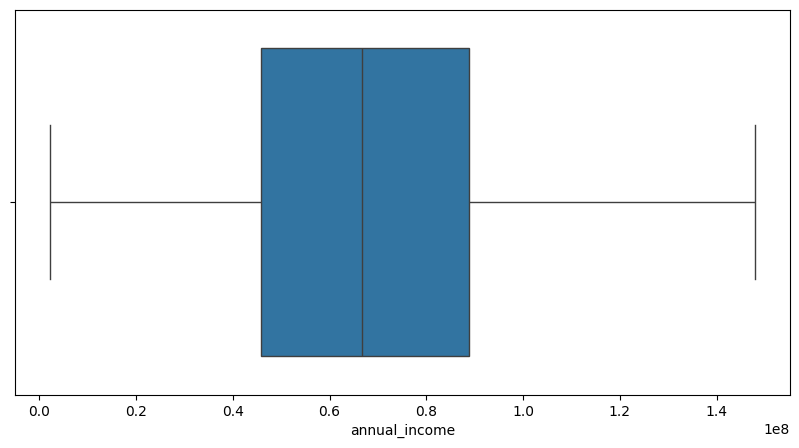

In [30]:
sns.boxplot(data=cust_df, x='annual_income');

## **3. RFM Customer Segmentation**

In [31]:
# Segment RFM scores into ranks
grade_labels = [1, 2, 3]
cust_df.loc[:, 'recency_grade'] = pd.qcut(cust_df['recency'], q=3, labels=grade_labels[::-1])
cust_df.loc[:, 'frequency_grade'] = pd.qcut(cust_df['num_purchase_total'], q=3, labels=grade_labels)
cust_df.loc[:, 'monetary_grade'] = pd.qcut(cust_df['amount_total'], q=3, labels=grade_labels)

#### **Recency**

In [32]:
cust_df['recency_grade'].value_counts()

,count
recency_grade,
3,752
1,730
2,723


In [33]:
groupby_recency_grade = cust_df.groupby('recency_grade', observed=False).sum(numeric_only=True).reset_index()
groupby_recency_grade

,recency_grade,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,3,35830,5.059218e+10,678,11988,293945600,26728000,157576900,37583000,25539800,42485300,583858600,3103,4386,1693,9182,54,12,67,55,60,179
1,2,35183,4.818995e+10,724,35840,294073000,23675600,151742500,35046700,25147200,41268500,570953500,2992,4240,1771,9003,47,8,47,52,48,95
2,1,35038,4.919261e+10,690,60237,289602300,25281100,164547500,35599200,27076400,42536000,584642500,2947,4215,1648,8810,41,10,49,57,53,59


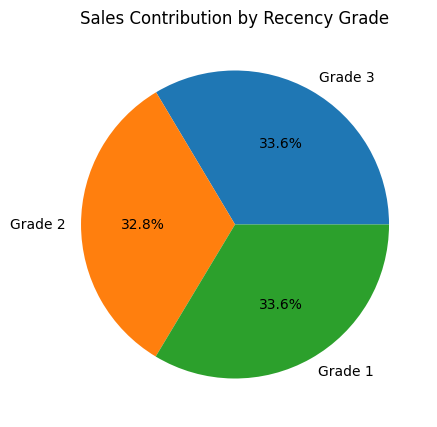

In [34]:
groupby_recency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'Grade {x}' for x in grade_labels[::-1]],
    title='Sales Contribution by Recency Grade',
    ylabel=''
);

#### **Frequency**

In [35]:
cust_df['frequency_grade'].value_counts()

,count
frequency_grade,
1,851
2,679
3,675


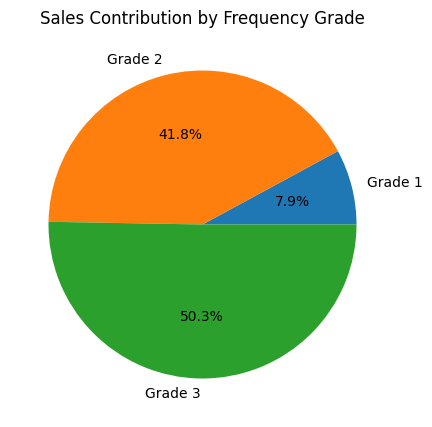

In [36]:
groupby_frequency_grade = cust_df.groupby('frequency_grade', observed=False).sum(numeric_only=True).reset_index()
groupby_frequency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'Grade {x}' for x in grade_labels],
    title='Sales Contribution by Frequency Grade',
    ylabel=''
);

#### **Monetary**

In [37]:
cust_df['monetary_grade'].value_counts()

,count
monetary_grade,
1,735
2,735
3,735


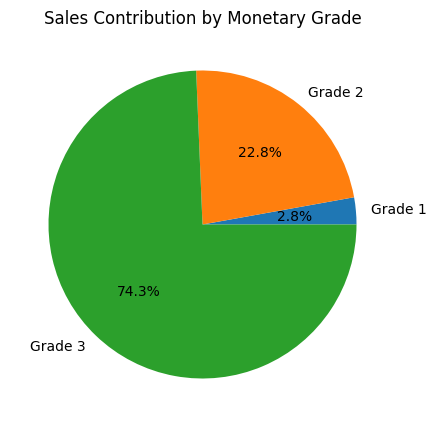

In [38]:
groupby_monetary_grade = cust_df.groupby('monetary_grade', observed=False).sum(numeric_only=True).reset_index()
groupby_monetary_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'Grade {x}' for x in grade_labels],
    title='Sales Contribution by Monetary Grade',
    ylabel=''
);

#### **Customer Segmentation Based on Weighted RFM Scoring**

In [39]:
# Set RFM weights and calculate RFM scores
weights = {'recency': 0.2, 'frequency': 0.4, 'monetary': 0.4}
cust_df.loc[:, 'rfm_score'] = (
    weights['recency'] * cust_df['recency_grade'].astype(int) +
    weights['frequency'] * cust_df['frequency_grade'].astype(int) +
    weights['monetary'] * cust_df['monetary_grade'].astype(int)
)
cust_df['rfm_score']

,rfm_score
0,2.4
1,1.2
2,2.6
3,1.4
4,2.2
...,...
2235,2.4
2236,2.4
2237,2.6
2238,3.0


In [40]:
# Assign RFM segments based on scores
def assign_segment(score):
    if score < 2:
        return 1
    elif score < 3:
        return 2
    else:
        return 3
cust_df.loc[:, 'rfm_segment'] = cust_df['rfm_score'].apply(assign_segment)

In [41]:
cust_df['rfm_segment'].value_counts()

,count
rfm_segment,
2,1096
1,986
3,123


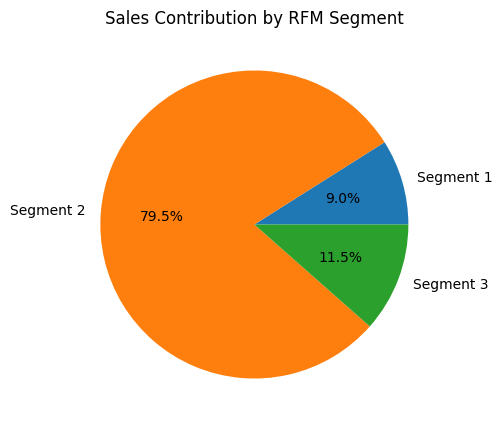

In [42]:
groupby_rfm_segment = cust_df.groupby('rfm_segment').sum(numeric_only=True).reset_index()
groupby_rfm_segment['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'Segment {x}' for x in grade_labels],
    title='Sales Contribution by RFM Segment',
    ylabel=''
);

## **4. Segment-wise Behavior Analysis**

##### **[1] Age Group Distribution by RFM Segment**

In [43]:
# Analyze age group distribution by segment
groupby_rfm_segment_age_group = cust_df.groupby(['rfm_segment', 'age_group'], observed=False).size().reset_index()
groupby_rfm_segment_age_group

,rfm_segment,age_group,0
0,1,30s,245
1,1,40s,343
2,1,50s,195
3,1,60 and above,141
4,1,Under 30,62
5,2,30s,166
6,2,40s,348
7,2,50s,254
8,2,60 and above,276
9,2,Under 30,52


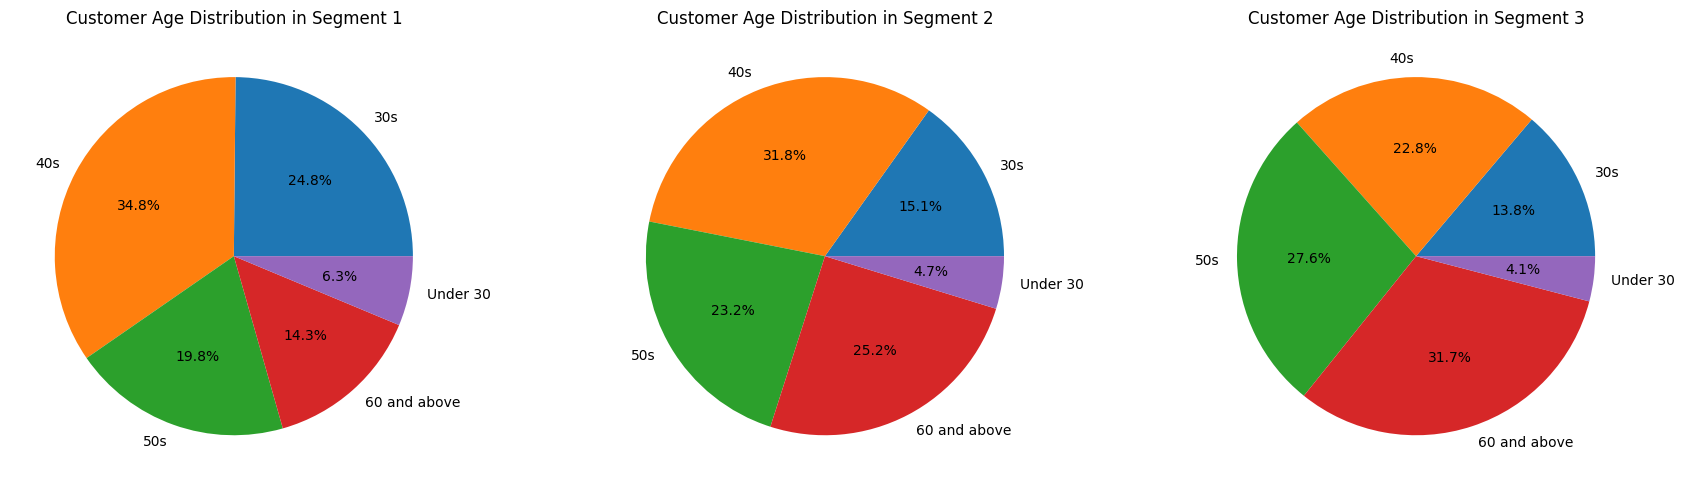

In [44]:
age_seg = cust_df.groupby(['rfm_segment', 'age_group'], observed=False).size().reset_index(name='num_customers')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, i in enumerate(grade_labels):
    seg_data = age_seg[age_seg['rfm_segment'] == i]
    seg_data.set_index('age_group')['num_customers'].plot(kind='pie', autopct='%.1f%%', ylabel='', ax=axes[idx])
    axes[idx].set_title(f'Customer Age Distribution in Segment {i}')
plt.tight_layout()
plt.show()

##### **[2] Marital Status Distribution by RFM Segment**

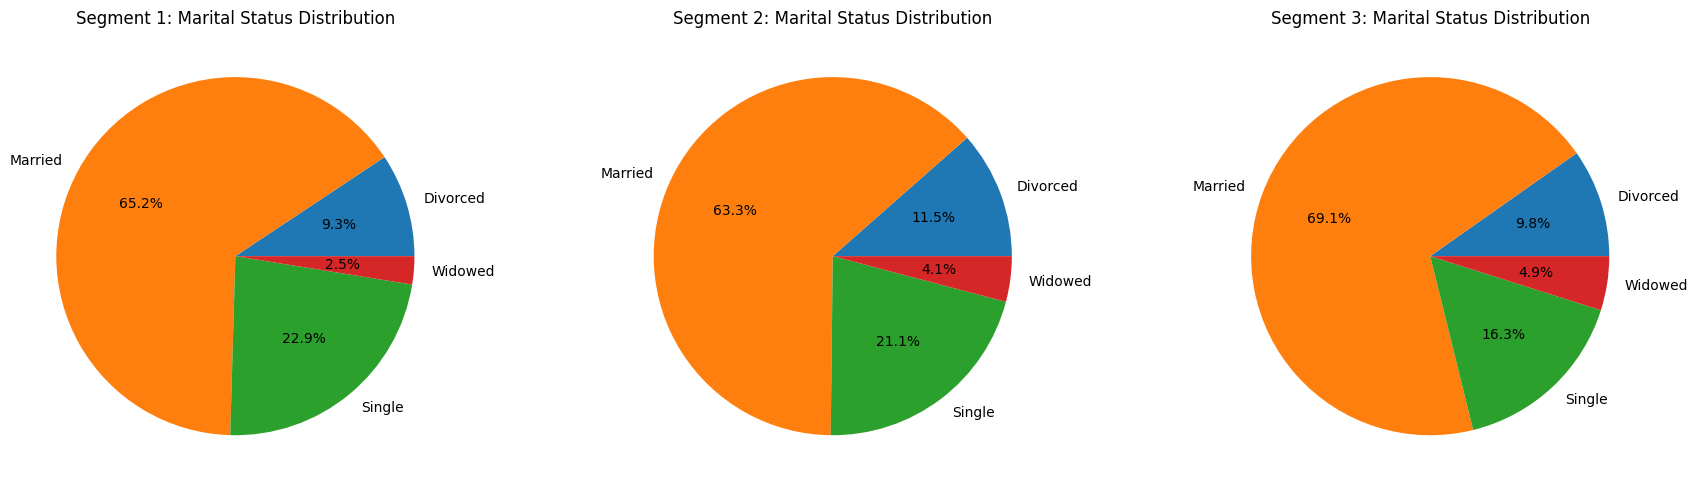

In [45]:
marital_seg_df = cust_df.groupby(['rfm_segment', 'marital_status'], observed=False).size().reset_index(name='count')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, seg in enumerate(sorted(marital_seg_df['rfm_segment'].unique())):
    data = marital_seg_df[marital_seg_df['rfm_segment'] == seg]
    axes[idx].pie(data['count'], labels=data['marital_status'], autopct='%.1f%%')
    axes[idx].set_title(f'Segment {seg}: Marital Status Distribution')
plt.tight_layout()
plt.show()

##### **[3] Number of Children Distribution by RFM Segment**

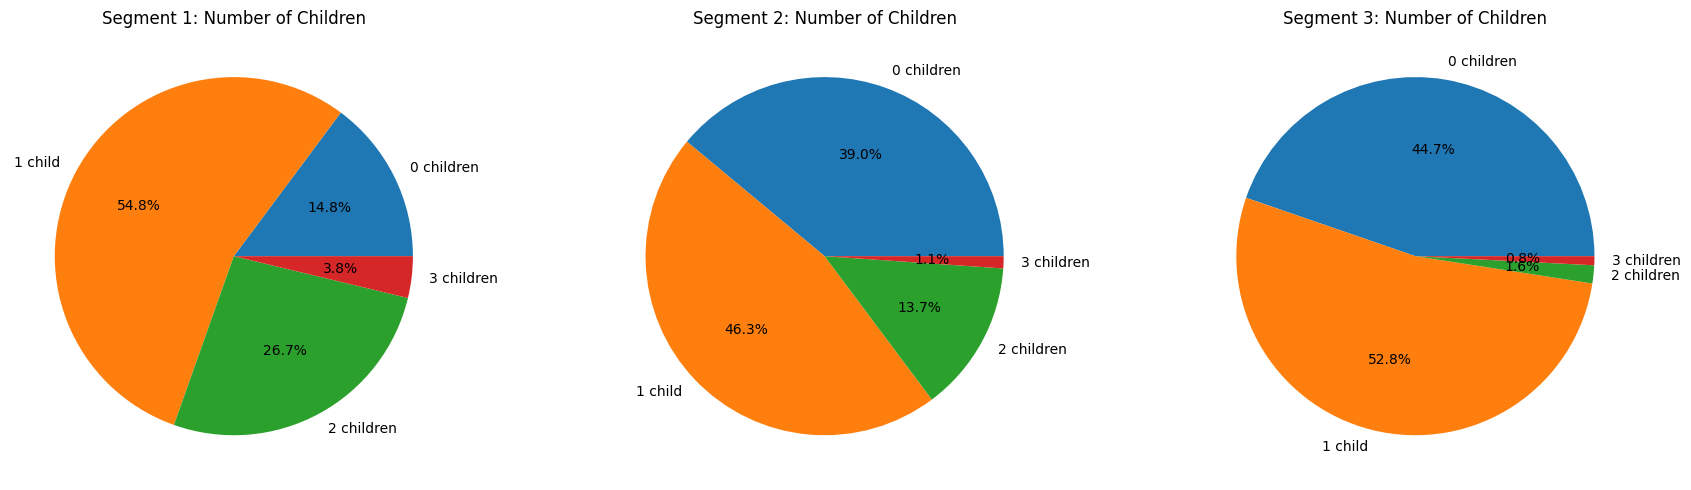

In [46]:
children_seg_df = cust_df.groupby(['rfm_segment','children']).size().reset_index(name='count')
fig, axes = plt.subplots(1,3, figsize=(18,5))
for idx, seg in enumerate(sorted(children_seg_df['rfm_segment'].unique())):
    data = children_seg_df[children_seg_df['rfm_segment']==seg]
    labels = [f'{int(x)} child' if x==1 else f'{int(x)} children' for x in data['children']]
    axes[idx].pie(data['count'], labels=labels, autopct='%.1f%%')
    axes[idx].set_title(f'Segment {seg}: Number of Children')
plt.tight_layout()
plt.show()

##### **[4] Revenue Contribution per Product Category by RFM Segment**

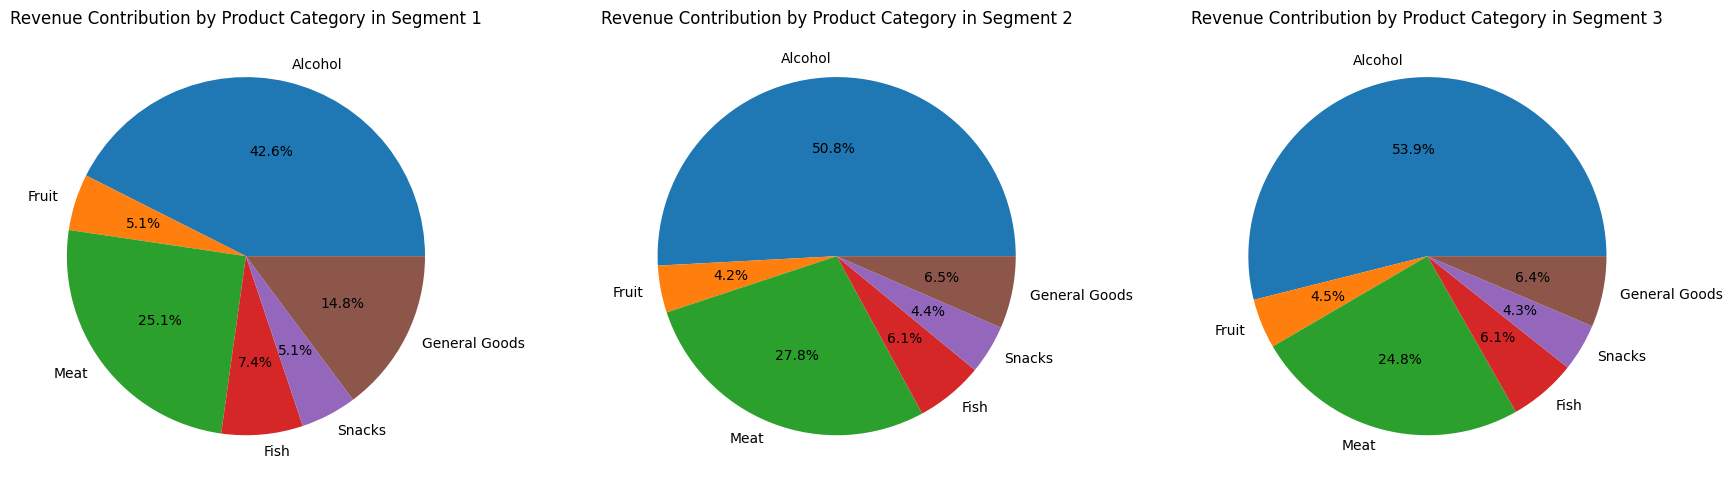

In [47]:
rfm_summary = cust_df.groupby('rfm_segment', observed=False).sum(numeric_only=True).reset_index()
product_cols = [col for col in rfm_summary.columns if col.startswith('amount_') and col != 'amount_total']
product_labels = ['Alcohol', 'Fruit', 'Meat', 'Fish', 'Snacks', 'General Goods']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, i in enumerate(grade_labels):
    rfm_summary.set_index('rfm_segment').loc[i, product_cols].plot(
        kind='pie', autopct='%.1f%%', labels=product_labels, title=f'Revenue Contribution by Product Category in Segment {i}',
        ylabel='', ax=axes[idx])
plt.tight_layout()
plt.show()

##### **[5] Promotion Participation Rate by RFM Segment**

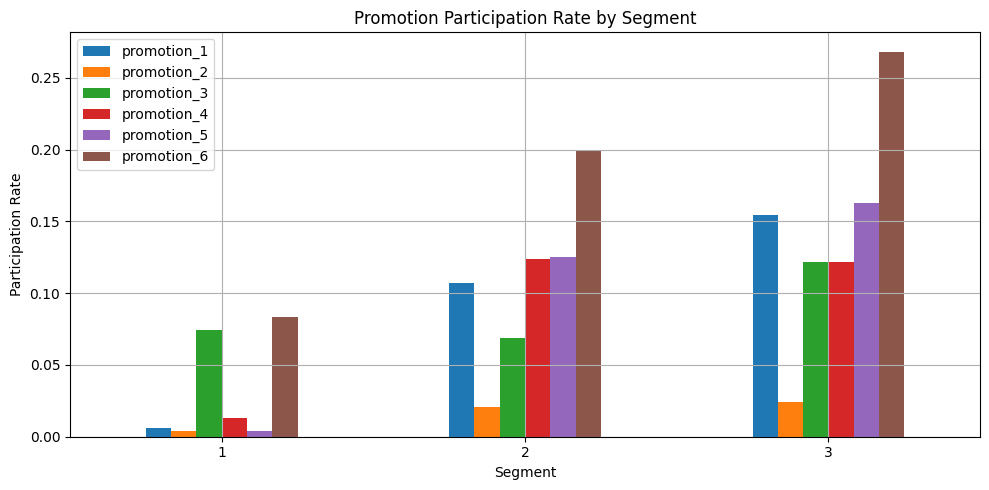

In [48]:
promotion_cols = [f'promotion_{i}' for i in range(1, 7)]
promo_avg = cust_df.groupby('rfm_segment').mean(numeric_only=True)[promotion_cols]

promo_avg.plot(kind='bar')
plt.title('Promotion Participation Rate by Segment')
plt.xlabel('Segment')
plt.ylabel('Participation Rate')
plt.xticks(rotation=360)
plt.grid()
plt.tight_layout()
plt.show()

## **5. RFM Analysis Conclusion and Strategic Insights**

Through RFM (Recency, Frequency, Monetary) analysis, we segmented customers into three strategic groups. The findings highlight strategic insights for optimizing marketing efforts with limited resources.

  - Segment 1: Low tier, low-activity customers
  - Segment 2: Mid tier, average customers
  - Segment 3: High tier, key valuable customers


#### **[1] Segment Analysis Summary**

**(1) Age Group Distribution**

- Segment 1 has the highest proportion of customers under 30.

- Segments 2 and 3 have a higher proportion of middle-aged or older customers.

- Higher RFM segments are associated with a lower percentage of younger customers.

**(2) Marital Status**

- Marital status shows minimal variation across segments.

- Around 65% of customers are married, followed by ~20% single.

**(3) Number of Children**

- As the segment level increases, the proportion of customers without children increases.

- Over 40% of Segment 3 customers have no children, the highest among all segments.

**(4) Revenue by Product Category**

- All segments show the highest revenue from alcohol, followed by meat.

- Segment 2 and 3's combined revenue share from alcohol and meat nears 80%.

- Lower-spending segments have a relatively higher contribution from general goods and snacks.

**(5) Promotion Participation Rate**

- Promotion engagement rises clearly with higher segment levels.

- Segment 3 shows the highest participation, especially in Promotion 6.

- Promotion 3 shows consistent participation across all segments.


### **[2] Marketing Strategy Recommendations**

**(1) Segment 3: High-Value Customer Focus**

- Segment 3 customers are typically middle-aged, married, and without children.

- Promote premium alcohol and meat products through bundled offers or exclusive deals.

- Provide loyalty programs and personalized rewards to retain this high-value segment.

**(2) Segment 1: Young Customer Strategy**

- High proportion of customers under 30, often with children.

- Focus on value-for-money promotions in snacks, general goods, and daily necessities.

- Improve participation through social media campaigns and targeted mobile notifications.

**(3) Promotion Strategy**

- Segment 3 shows strong responsiveness to promotions—prioritize them for new product trials and rewards campaigns.

- Promotion 2 needs redesign based on low engagement metrics.

- Promotion 6 showed high engagement across all segments—leverage it in core promotional strategies.